In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
from PIL import Image as img
import numpy as np
import pandas as pd
#tf, keras imports
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from clf import get_clf

#suppress warnings
import warnings
warnings.simplefilter('ignore')

import cv2
import gc
import random
from sklearn.utils import shuffle


Using TensorFlow backend.


### Data labels 

In [9]:
file = 'HASYv2/hasy-data-labels.csv'
df = pd.read_csv(file)

### Symbols 

In [6]:
sym_file = 'HASYv2/symbols.csv'
symbols = pd.read_csv(sym_file)

## Subset of data: digits only

In [11]:
digits = df[(df['symbol_id']<=79) & (df['symbol_id']>=70)]
# digits 0-9
symbols.iloc[27:37]
digits

,path,symbol_id,latex,user_id
345,hasy-data/v2-00345.png,70,0,10
346,hasy-data/v2-00346.png,70,0,31
347,hasy-data/v2-00347.png,70,0,10
348,hasy-data/v2-00348.png,70,0,10
349,hasy-data/v2-00349.png,70,0,10
...,...,...,...,...
20823,hasy-data/v2-20823.png,79,9,101356
20824,hasy-data/v2-20824.png,79,9,116471
20825,hasy-data/v2-20825.png,79,9,124511
20826,hasy-data/v2-20826.png,79,9,124916


In [12]:
# digits
# #Display imgs
# for x in digits.path:
#     print('HASYv2/'+x)
#     display(Image(filename='HASYv2/'+x))

# Make pixel arrays

In [12]:
def make_pixel_array(df):
    im = img.open('HASYv2/'+df['path'],'r').convert('L')
    return np.asarray(im)  ##255-val inverts colors

In [13]:
# digits= digits.iloc[:50000]
digits['pixels']=digits.apply(make_pixel_array,axis=1)

# Process image

In [14]:
nrows = 28
ncolumns = 28
channels = 1
def read_process_images(img_list,y,invert=False):
    img_list,y = shuffle(img_list,y)
#     y = [int(label) for label in y]
    X=[]
    for path in img_list:
        image = 'HASYv2/' + path       ##can do color .IMREAD_COLOR
        X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_GRAYSCALE),(nrows,ncolumns),interpolation=cv2.INTER_CUBIC))
    if invert==True:
        return 255-np.array(X),np.array(y)
    return np.array(X),np.array(y)

In [15]:
X,y = read_process_images(digits['path'],digits['latex'],invert=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
# ntrain = len(X_train)
# ntest = len(X_test)
# batch_size = 32

# plt.figure(figsize=(20,10))
# cols = 5
# for i in range(cols):
#     if y_train[i][0]=="\\":
#         label = y_train[i][1:]
#     else:
#         label = y_train[i]    
#     plt.subplot(5/cols+1,cols,i+1)
#     plt.imshow(X[i])
#     plt.title(label,fontsize=20)

# gc.collect();

# HaSYv2 Dataset

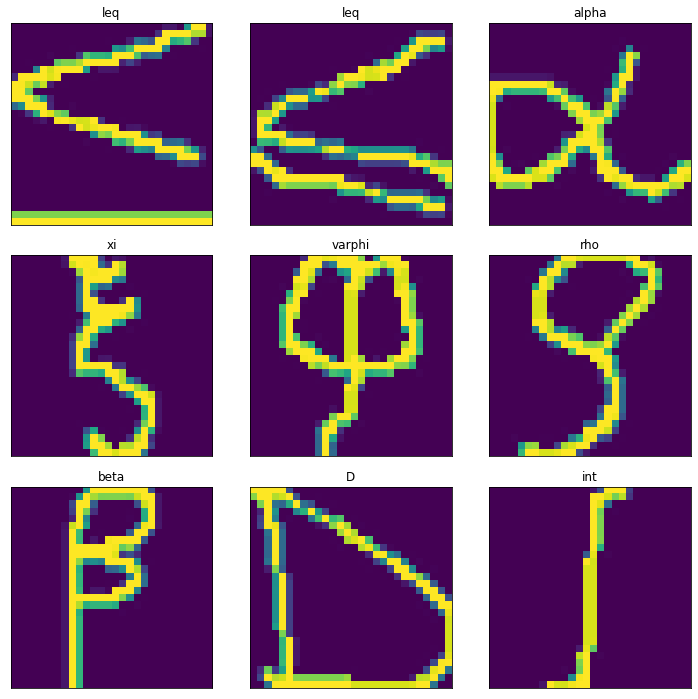

In [64]:
X,y = read_process_images(digits['path'],digits['latex'],invert=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
fig = plt.figure(figsize=(10,10))
for i in range(9):
    if y_train[i][0]=="\\":
        label = y_train[i][1:]
    else:
        label = y_train[i]
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i],interpolation='none')
    plt.title(label)
    plt.xticks([])
    plt.yticks([])


In [67]:
clf = DecisionTreeClassifier()
clf.fit(X_train.flatten().reshape(len(X_train), -1), y_train)
y_predict_hasy = clf.predict(X_test.flatten().reshape(len(X_test), -1))

In [68]:
print(accuracy_score(y_test,y_predict_hasy))

0.348


# MNIST Dataset

In [16]:
(X_tr,y_tr),(X_ts,y_ts) = mnist.load_data()

In [17]:
# fig = plt.figure()
# for i in range(9):
#     plt.subplot(3,3,i+1)
#     plt.tight_layout()
#     plt.imshow(X_tr[i],cmap='gray',interpolation='none')
#     plt.title('Digit: {}'.format(y_tr[i]))
#     plt.xticks([])
#     plt.yticks([])

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_tr.flatten().reshape(len(X_tr), -1), y_tr)
yhat = clf.predict(X_ts.flatten().reshape(len(X_ts), -1))

In [60]:
print(accuracy_score(y_ts,yhat))

0.8772


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [131]:
y_tr.shape

(60000,)

In [30]:
import tensorflow as tf
keras = tf.keras
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import pandas as pd
%matplotlib inline

# Join MNIST and HaSYv2 Datasets

In [18]:
X_JOINED = np.concatenate((X_tr, X,X_ts), axis=0)

In [19]:
y_JOINED = np.concatenate((y_tr, y,y_ts), axis=0)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X_JOINED, y_JOINED, train_size=.8)

In [26]:
conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dense(64, activation='relu'))
conv_model.add(layers.Dense(10, activation='softmax'))
conv_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
x_train = x_train.astype('int32')
x_test = x_test.astype('int32')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [45]:
x_train = np.array([x.reshape(28,28,1) for x in x_train])
x_test = np.array([x.reshape(28,28,1) for x in x_test])
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(y_train).astype('int32')

encoder = LabelEncoder()
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(y_test).astype('int32')
conv_model.fit(x_train, dummy_y_train, batch_size=32, epochs=20)

Train on 56816 samples
Epoch 1/20
56816/56816 [==============================] - 39s 688us/sample - loss: 0.0230 - accuracy: 0.9930
Epoch 2/20
56816/56816 [==============================] - 41s 724us/sample - loss: 0.0219 - accuracy: 0.9938
Epoch 3/20
56816/56816 [==============================] - 38s 672us/sample - loss: 0.0183 - accuracy: 0.9951
Epoch 4/20
56816/56816 [==============================] - 38s 663us/sample - loss: 0.0212 - accuracy: 0.9944
Epoch 5/20
56816/56816 [==============================] - 36s 642us/sample - loss: 0.0183 - accuracy: 0.9948
Epoch 6/20
56816/56816 [==============================] - 36s 641us/sample - loss: 0.0205 - accuracy: 0.9951
Epoch 7/20
56816/56816 [==============================] - 37s 649us/sample - loss: 0.0179 - accuracy: 0.9954
Epoch 8/20
56816/56816 [==============================] - 37s 647us/sample - loss: 0.0161 - accuracy: 0.9962
Epoch 9/20
56816/56816 [==============================] - 37s 650us/sample - loss: 0.0191 - accuracy: 0.9

In [46]:
from datetime import datetime
saved_model_path = "./saved_models/mnist_hasyv2_20epochs_{}.h5".format(datetime.now().strftime("%Y%m%d%s")) # _%H%M%S
# Save entire model to a HDF5 file
conv_model.save(saved_model_path)

In [47]:
def get_prediction(y):
    return np.argmax(y)
y_pred_prob = conv_model.predict(x_test.astype('float32'))
y_pred = np.array([get_prediction(y) for y in y_pred_prob])

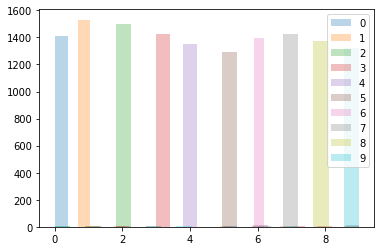

In [48]:

fig, ax = plt.subplots()
ax.hist(y_pred[y_test == 0], alpha=0.3, bins=20, label="0")
ax.hist(y_pred[y_test == 1], alpha=0.3, bins=20, label="1")
ax.hist(y_pred[y_test == 2], alpha=0.3, bins=20, label="2")
ax.hist(y_pred[y_test == 3], alpha=0.3, bins=20, label="3")
ax.hist(y_pred[y_test == 4], alpha=0.3, bins=20, label="4")
ax.hist(y_pred[y_test == 5], alpha=0.3, bins=20, label="5")
ax.hist(y_pred[y_test == 6], alpha=0.3, bins=20, label="6")
ax.hist(y_pred[y_test == 7], alpha=0.3, bins=20, label="7")
ax.hist(y_pred[y_test == 8], alpha=0.3, bins=20, label="8")
ax.hist(y_pred[y_test == 9], alpha=0.3, bins=20, label="9")
ax.legend()

In [49]:
results  = pd.DataFrame(y_test)
results.columns = ['actual']
results['predict']=y_pred
results['match']=(results['actual']==results['predict'])*1

In [50]:
results

,actual,predict,match
0,0,0,1
1,1,1,1
2,1,1,1
3,5,5,1
4,9,9,1
...,...,...,...
14199,6,6,1
14200,2,2,1
14201,8,8,1
14202,2,2,1


In [51]:
results['match'].value_counts()

1    14027
0      177
Name: match, dtype: int64

In [52]:
14027/len(results)

0.9875387214869051

In [254]:
get_clf(X_train1, X_test1, y_train1, y_test1)[1]

0.8713038580681498

# INKml to png conversion

In [3]:
import inkml.inkml2img as conv
import subprocess
import os

In [10]:
ink_files = []
f = os.popen("ls INKdata/trainData_2012_part1/*.inkml")
for i in f.readlines():
    ink_files.append(i[:-1])
f.close()    

In [11]:
!ls train2012_png/

TrainData1_8_sub_12.png   TrainData2_17_sub_88.png  TrainData2_25_sub_9.png
TrainData1_8_sub_15.png   TrainData2_17_sub_95.png  TrainData2_26_sub_11.png
TrainData1_8_sub_19.png   TrainData2_17_sub_98.png  TrainData2_26_sub_13.png
TrainData1_8_sub_21.png   TrainData2_17_sub_9.png   TrainData2_26_sub_15.png
TrainData1_8_sub_24.png   TrainData2_18_sub_11.png  TrainData2_26_sub_17.png
TrainData1_8_sub_28.png   TrainData2_18_sub_13.png  TrainData2_26_sub_1.png
TrainData1_8_sub_9.png	  TrainData2_18_sub_15.png  TrainData2_26_sub_20.png
TrainData2_0_sub_11.png   TrainData2_18_sub_17.png  TrainData2_26_sub_29.png
TrainData2_0_sub_13.png   TrainData2_18_sub_1.png   TrainData2_26_sub_33.png
TrainData2_0_sub_15.png   TrainData2_18_sub_20.png  TrainData2_26_sub_39.png
TrainData2_0_sub_17.png   TrainData2_18_sub_29.png  TrainData2_26_sub_41.png
TrainData2_0_sub_1.png	  TrainData2_18_sub_33.png  TrainData2_26_sub_43.png
TrainData2_0_sub_20.png   TrainData2_18_sub_39.png  TrainData2_26_sub_46.png
Tra

In [12]:
from skimage import io
from skimage import filters, color
from scipy import ndimage as ndi


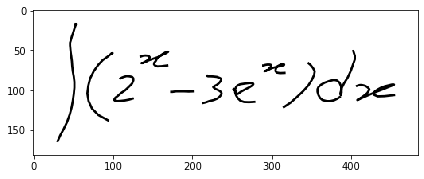

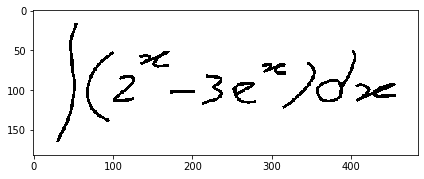

number of objects 11


In [6]:
# digit = io.imread('train2012_png/TrainData2_2_sub_61.png')
io.imshow(digit)
io.show()
digit.ndim
gray_image = color.rgb2gray(digit)
thresh = filters.threshold_mean(gray_image)
binary_image = gray_image > thresh

io.imshow(binary_image)
io.show()
label_objects, nb_labels = ndi.label(np.invert(binary_image))
print("number of objects", nb_labels)

number of objects 11


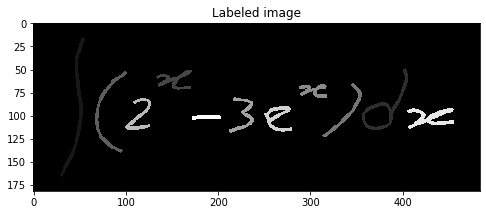

In [7]:
arr = np.array(label_objects)

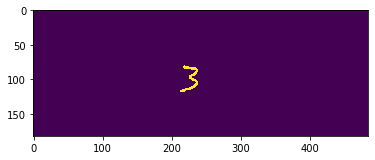

In [8]:

# fig,axes = plt.subplots(nb_labels,1,figsize=(20,7*nb_labels))
# for ax in axes.flatten():
#     for segment in range(1,nb_labels+1):
#         ax.imshow(arr==segment)
two = arr==8
three = arr==7
plt.imshow(three);

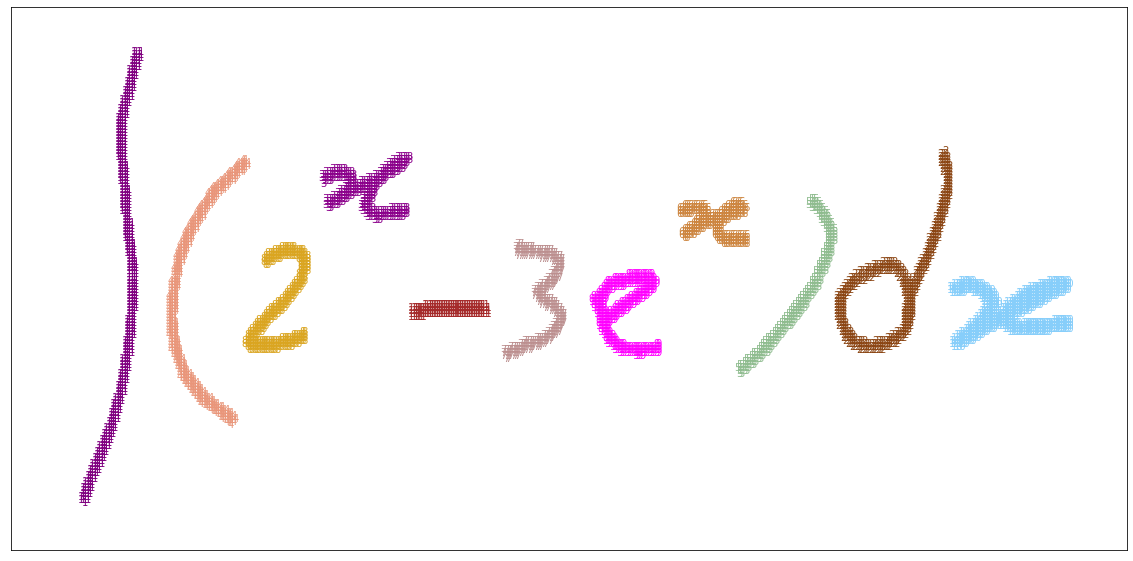

In [347]:
plt.rcParams["figure.figsize"] = (20,10)
pixarray=np.rot90(label_objects,3)
imax,jmax = pixarray.shape
plt.xticks(np.arange(0,imax))
plt.yticks(np.arange(0,jmax))
np.random.shuffle(colors)
ind = range(nb_labels)
for i in range(imax):
    for j in range(jmax):
        val = pixarray[i][j]
        if val != 0:
            plt.text(i,j,val,fontsize=10,color=colors[val])
plt.xticks([])
plt.yticks([])            
plt.show()


In [343]:
np.rot90(label_objects).shape

(484, 182)

In [332]:
import matplotlib.colors as mcolors
from matplotlib.patches import Circle
from itertools import chain
colors = np.array(list(chain(mcolors.CSS4_COLORS.values())))

(182, 484)

In [8]:
three = arr==7
plt.imshow(three);

NameError: name 'arr' is not defined

In [62]:
model = models.Sequential()  #stack layers sequentially
model.add(layers.Conv2D(batch_size,(3,3),activation='relu',input_shape=(nrows,ncolumns,channels)))
model.add(layers.MaxPooling2D((2,2)))
for i in [64,128]:
    model.add(layers.Conv2D(i,(3,3),activation='sigmoid',input_shape=(nrows,ncolumns,channels)))
    model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [122]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [123]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)              

In [124]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow(X_train,y_train,batch_size=batch_size)
val_generator = val_datagen.flow(X_test,y_test,batch_size=batch_size)

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch = ntrain//batch_size,
                             epochs = 64, validation_data = val_generator, validation_steps=ntest//batch_size)